# MDO - Multidisciplinary Analysis (MDA)
## Problem 1: INTRODUCTION TO FIXED POINT ITERATION (FPI)

* Original problem developped by Prof. Joseph Morlier and Joan Mas Colomer.
* Python adaptation done by Oriol Chandre Vila.

ISAE - SUPAERO, April 2021.

### 1 - Introduction

Fixed Point Iteration is a simple iterative method for solving systems of non-linear equations, such
as the general two-equation non-linear system illustrated below:
* f1(x1, x2) = 0
* f2(x1, x2) = 0

### 2 - Description of the problem

This can be simplified using vector notation by writing f(x) = 0. The vectors in this notation could
be of any size, as long as the size of the f and 0 vectors are equal. If the constituent equations are
independent, i.e. no equation depends on the output of another equation, then the solution is
trivial. In this case, each equation may be solved independently. The case of non-independent
equations (coupled) is more difficult. Consider the following example *(from James T. Allison, Introduction to Matlab CNS 3320).*

$$y21(y12) = 0.25\cdot y12 − 0.25$$
$$y12(y21) = 2 + 2\cdot y21$$

This is special notation commonly used in coupled system analysis. The first function $y21$ depends
on the output of the second function $y12$, and vice versa. The subscripts indicate the information
flow. For example, $y21$ is the information generated by equation 1 that is required as input by
equation 2 (2 ← 1). Note that although this example is linear, the method applied in this section is
valid for non-linear systems. The interdependence, or coupling, between the two equations can
be illustrated with a block diagram.

![Block Diagram](img/block_diag.PNG)

This shows the complete information flow of the system.

Remember that in a general non-linear system the constituent **functions may not be known
explicitly, but are rather black box functions**. An intuitive approach to solving this system stems
from the diagram above. Make a guess for one of the values, say $y21$, and then use that
value to calculate $y12$, which is in turn used to find an updated value of $y21$. This is repeated until
the values stop changing, and is called the Fixed-Point Iteration process.

Here it is the general algorithm:

![Algorithm](img/alg.PNG)

In the case of this simple example the solution can be viewed graphically. The functions $y21$ and
$y12$ are plotted in the figure below. The point where these functions cross is the solution to the system,
also called a fixed point.

![FPI](img/fpi.PNG)

### 3 - Tasks

Implementing the Fixed-Point Iteration solution in Matlab requires the creation of two new
functions and a script file to coordinate the functions

> Remember that Gauss-Seidel approach are really efficient (see [openMDAO](https://openMDAO.org)) This is a starting point for
the next project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def  y12(x):
    y = 2 + 2*x
    return y

In [3]:
def y21(x):
    y = 0.25*x - 0.25
    return y

In [4]:
# initial guess
y12_old = 10
# stopping criteria
epsilon = 1e-3
# initialize parameters
error = 1e3
y12_list = []
y21_list = []
while error > epsilon:
    y21_new = y21(y12_old)
    y12_new = y12(y21_new)
    error = abs(y12_new-y12_old)
    y12_list.append(y12_new)
    y21_list.append(y21_new)
    y12_old = y12_new

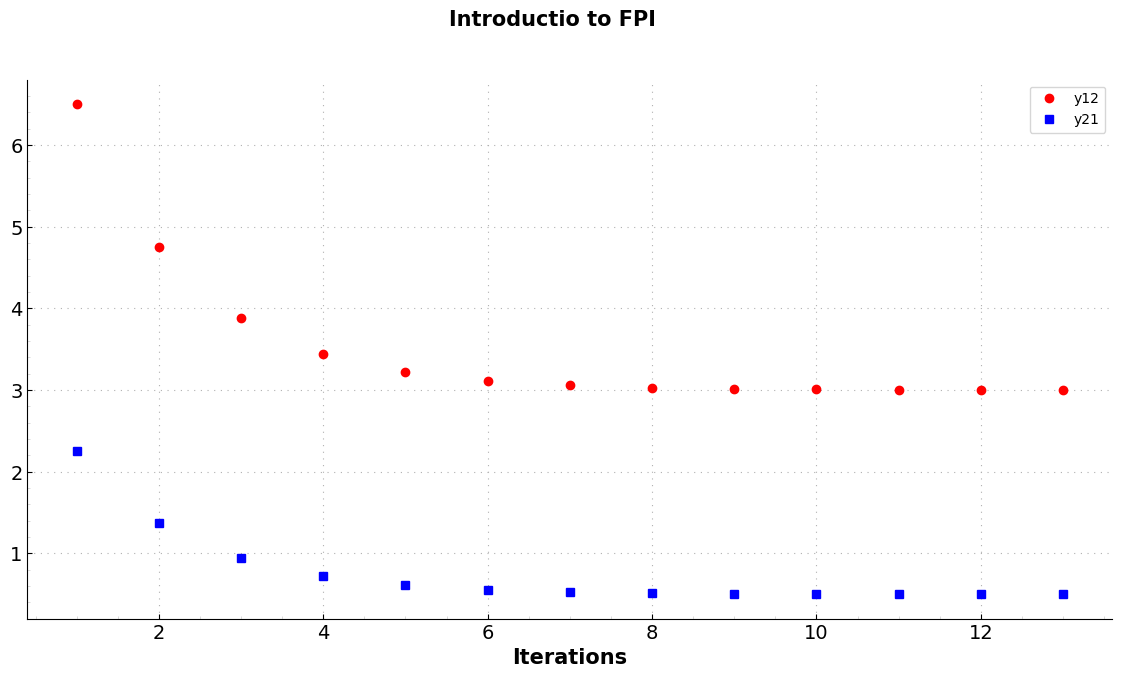

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Number of iterations = 13
     y12     = 3.001
     y21     = 0.500


In [5]:
## Post processing
it = np.linspace(1,len(y12_list),num=len(y12_list))
# Plotting
fig,ax = plt.subplots(figsize=(14,7))
ax.plot(it,y12_list,'ro',label='y12')
ax.plot(it,y21_list,'bs',label='y21')
# Format of the Plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.minorticks_on()
ax.legend()
ax.tick_params(axis='both',labelsize=14,direction='in')
ax.tick_params(axis='both',which='minor',direction='in',color='lightgray')
ax.grid(linestyle='dotted',dashes=(1, 5))
ax.set_xlabel('Iterations',fontweight='bold',fontsize=15)
plt.suptitle('Introductio to FPI',fontweight='bold',fontsize=15)
plt.show()

print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
print('Number of iterations = %i'%int(len(y12_list)))
print('     y12     = %1.3f'%y12_list[-1])
print('     y21     = %1.3f'%y21_list[-1])